# Discussion 2 - Clustering, Solutions

### Purpose
The purpose of this discussion is to provide further understanding about the different types of clustering. In class, we talked about only 2 types: distribution clustering (with Gaussian Mixture Models or GMM) and centroid-based clustering (with K-Means clustering).

### Description
In clustering, the goal is to find groups (or clusters) of samples that are similar to one another. This similarity measure can be defined in many different ways including: distance metric, probability value, density criteria, dendrogram threshold or spectral solution (eigenvectors) of similarity matrix. 

These different similarity measures are highly tied to the type of clustering one is performing. There are 5 types of clustering:

1. Centroid clustering, e.g. k-Means
2. Distribution clustering, e.g. GMM
3. Density clustering, e.g. DBSCAN
4. Hierarchical clustering, e.g. dendrograms
5. Graph clustering, e.g. spectral algorithm

### How to Prepare
In order to answer the following questions, read the following materials:

* Paper ["A Density-based Algorithm for Discovering Clusters in Large Spatial Databases with Noise"](https://www.aaai.org/Papers/KDD/1996/KDD96-037.pdf)
* Section 11.3 "Locating Regions of High Density via DBSCAN", pp. 372-377, from the textbook Python Machine Learning by Sebastian Raschka (this textbook is available as an online book via [Course Reserves](https://ebookcentral.proquest.com/lib/UFL/detail.action?docID=5050960))

### Assignment
Consider the following dataset and answer the questions below:

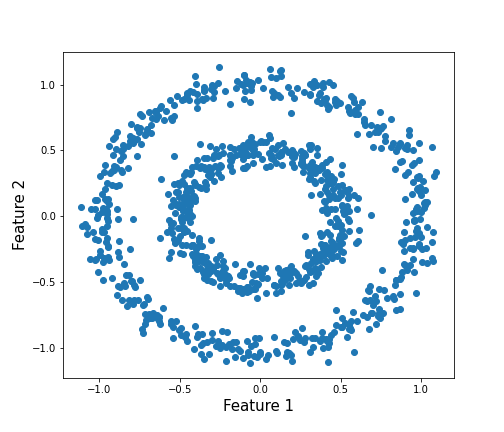

In [1]:
from IPython.display import Image
Image('circles.png',width=400)

1. Describe the approach of density-based clustering, in particular for DBSCAN.
2. Describe the two parameters for DBSCAN.
3. Describe the advantages of DBSCAN over k-Means and GMM.
4. Between k-Means with Euclidean distance, GMM and DBSCAN, which, if any, will be able to cluster this dataset into 2 clusters (the inner circle and the outer circle)? Explain your reasoning.
5. Describe the disadvantages of DBSCAN.

___

#### Answer Key

1. In density-based clustering, a cluster is formed if there is a *sufficient* amount of neighboring points (density). In DBSCAN, each point is marked as one of three categories: a **core point**, which is surrounded by a certain number of neighboring points in a given radius; a **border point**, which is not surrounded by the same amount of neighboring points but is within a radius of a core point; and a **noise point**, which is any other point that does not fall into the other two categories. With these markings, the DBSCAN algorithm forms clusters for groups of core points and assigns the border points to the cluster with their respective core point. So **there will be as many clusters as there are core points**.

2. The two parameters are: the value for the minimum number of neighboring points (*MinPts*), this will determine the number of points a core point must have in order to be marked as a core point; and the radius parameter (*epsilon*, $\epsilon$) determines a fixed radius region in which neighboring points must *live on* in order to be marked as a core point or border point.

3. DBSCAN has the advantage over both k-means and GMM in which it **finds clusters without needing to define the number of clusters a priori**. DBSCAN has the advantage over k-means as it is able to find groups with different number of points (different densities) and without making explicit assumptions about cluster shape. DBSCAN has the advantage over GMM because it is of much lower computational complexity, in the order of $O(N\log(N))$. Moreover, DBSCAN is the only one of the 3 clustering algorithms that is able to mark points as noise points, making it robust against outliers for subsequent classification task.

4. The classic k-Means (with Euclidean distance) will not be able to separate the concentric circles as two ring clusters (inner circle and outer circle), because k-means assumes circular (or spherical in higher-dimensions) clusters. The GMM will also not be able to separate this data into the two ring clusters, as demonstrated in class. The DBSCAN will be able to separate the two clusters with a carefully chosen value for the two parameters. See the code example below.

5. As with any algorithm that uses distances, DBSCAN will too be heavily affected by the curse of dimensionality. DBSCAN will also have trouble finding clusters with different densities (number of points).

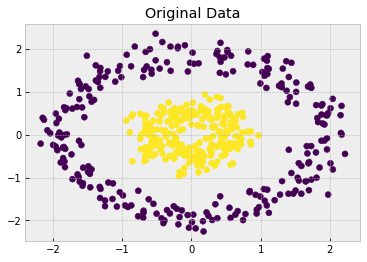

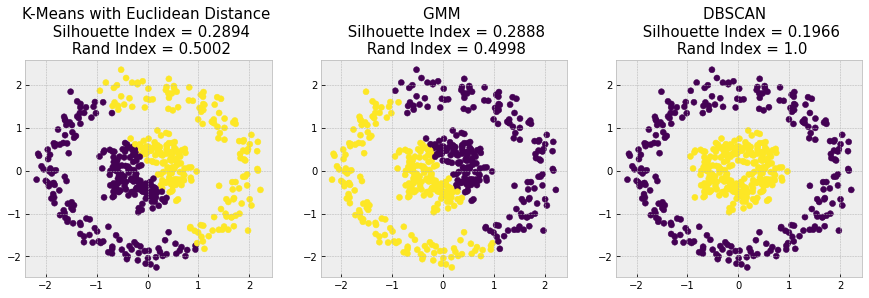

In [12]:
# Code comparing the performance of classic K-Means, GMM and DBSCAN
# Dataset: two concentric circles

import numpy as np
from sklearn.datasets import make_circles
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, rand_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

# Generating data
# X - 2-D data
# y - labels
X, y = make_circles(n_samples=500, factor=0.3, noise=0.1)

# Scaling data (using standardization)
X = StandardScaler().fit_transform(X)

# Plotting synthetic data

plt.scatter(X[:,0],X[:,1],c=y)
plt.title('Original Data');

# Training the 3 clustering algorithms
kmeans = KMeans(2).fit(X) # k=2
gmm = GaussianMixture(2).fit(X) # 2 components 
dbscan = DBSCAN(eps=0.5, min_samples=10) # radius eps=0.5 and MinPts=10

# Plotting results for all 3 clustering algorithms
# Silhouette index is computed per clustering result
# Rand index score is computed for each clustering result vs the true labels (y)
fig=plt.figure(figsize=(15,4))
fig.add_subplot(1,3,1)
plt.scatter(X[:,0],X[:,1],c=kmeans.predict(X))
plt.title('K-Means with Euclidean Distance \n Silhouette Index = '+
          str(round(silhouette_score(X,kmeans.predict(X)),4))+'\n Rand Index = '+
              str(round(rand_score(y, kmeans.predict(X)),4)),size=15)

fig.add_subplot(1,3,2)
plt.scatter(X[:,0],X[:,1],c=gmm.predict(X))
plt.title('GMM \n Silhouette Index = '+
          str(round(silhouette_score(X,gmm.predict(X)),4))+'\n Rand Index = '+
              str(round(rand_score(y, gmm.predict(X)),4)),size=15)

fig.add_subplot(1,3,3)
plt.scatter(X[:,0],X[:,1],c=dbscan.fit_predict(X))
plt.title('DBSCAN  \n Silhouette Index = '+
          str(round(silhouette_score(X,dbscan.fit_predict(X)),4))+'\n Rand Index = '+
              str(round(rand_score(y, dbscan.fit_predict(X)),4)),size=15);

Note that the **rand index** (external criteria) is maximum (equal to 1) for DBSCAN, that is, the clustering result produced by DBSCAN perfectly identified the true underlying labels for this synthetic dataset.

But note that DBSCAN produced the **smallest** silhouette index score. This is because this internal criteria will measure "success" if the clustering result produces clusters that are compact and far away from each other, which imposes a particular shape for the clusters, namely circular or spherical.

Let's use the rand index score to assess consistency between clustering results:

In [14]:
print('Rand Index score')
print('Classic K-Means vs GMM = ', rand_score(kmeans.predict(X),gmm.predict(X)))
print('Classic k-Means vs DBSCAN = ', rand_score(kmeans.predict(X),dbscan.fit_predict(X)))
print('Classic GMM vs DBSCAN = ', rand_score(gmm.predict(X),dbscan.fit_predict(X)))

Rand Index score
Classic K-Means vs GMM =  0.9840961923847695
Classic k-Means vs DBSCAN =  0.5001523046092184
Classic GMM vs DBSCAN =  0.4997995991983968


From the results, classic K-Means (using Euclidean distance) and GMM report the most consistent results, with a rand index score above 0.98. If we did not have the true labels, with these quantitative measures, and without the aid of data visualization, we might be tempted to choose the clustering results produced with K-Means or GMM.

The fact that clustering is an unsupervised task, is what makes it so challenging.